# Vision models - model training using transfer learning



## Python imports

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as pyplt
import matplotlib.ticker
import pandas as pd
import sklearn.model_selection
import tensorflow as tf
import tensorflow_hub as hub
import time
import TFLite

2025-05-16 20:13:51.086980: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 20:13:51.129944: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 20:13:51.130468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-16 20:13:51.788592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Read test data sets

In [2]:
DATASET_IDS = ['TS', 'PW', 'RW']
MODELS = [ 
    #'automl',
    'InceptionV1', 
    'InceptionV2', 
    'MobileNetV1', 
    'MobileNetV2', 
    'MobileNetV3', 
    'NasNetMobile', 
    'ResNetV1', 
    'ResNetV2']

datagen = ImageDataGenerator(rescale=1.0/255.0)
P_DIM=224
P_BATCH_SIZE=32
DATASETS = {
    id : datagen.flow_from_dataframe(
        pd.read_csv('datasets/vision/'+id+'.tsv', sep='\t'),
        target_size=(P_DIM,P_DIM),
        batch_size=P_BATCH_SIZE,
        class_mode='sparse',
        shuffle=False,
        x_col='image',
        y_col='label'
    ) for id in DATASET_IDS
}

Found 941 validated image filenames belonging to 21 classes.
Found 374 validated image filenames belonging to 21 classes.
Found 539 validated image filenames belonging to 21 classes.


In [3]:
results = []
for m in MODELS:
    model = tf.keras.models.load_model('models/vision/' + m )
    r = [m]
    for d,ds in DATASETS.items():
        loss, acc = model.evaluate(ds)
        r.append(acc)
    print(r)
    results.append(r)
plot_data = pd.DataFrame(results, columns=['Model'] + DATASET_IDS)
plot_data

17/17 [==============================] - 6s 351ms/step - loss: 0.8440 - accuracy: 0.7607
['InceptionV1', 0.8756641745567322, 0.6470588445663452, 0.7606679201126099]
17/17 [==============================] - 8s 431ms/step - loss: 0.8896 - accuracy: 0.7440
['InceptionV2', 0.8639745116233826, 0.6203208565711975, 0.7439703345298767]
17/17 [==============================] - 4s 252ms/step - loss: 0.7679 - accuracy: 0.7885
['MobileNetV1', 0.911795973777771, 0.6737967729568481, 0.7884972095489502]
17/17 [==============================] - 5s 259ms/step - loss: 0.9476 - accuracy: 0.7458
['MobileNetV2', 0.8852284550666809, 0.6176470518112183, 0.7458255887031555]
17/17 [==============================] - 3s 185ms/step - loss: 0.8102 - accuracy: 0.7792
['MobileNetV3', 0.8990435600280762, 0.6818181872367859, 0.7792207598686218]
17/17 [==============================] - 6s 342ms/step - loss: 1.1059 - accuracy: 0.7217
['NasNetMobile', 0.8342189192771912, 0.6176470518112183, 0.7217068672180176]
17/17 [===

,Model,TS,PW,RW
0,InceptionV1,0.875664,0.647059,0.760668
1,InceptionV2,0.863975,0.620321,0.743970
2,MobileNetV1,0.911796,0.673797,0.788497
3,MobileNetV2,0.885228,0.617647,0.745826
4,MobileNetV3,0.899044,0.681818,0.779221
5,NasNetMobile,0.834219,0.617647,0.721707
6,ResNetV1,0.906482,0.647059,0.755102
7,ResNetV2,0.890542,0.655080,0.768089


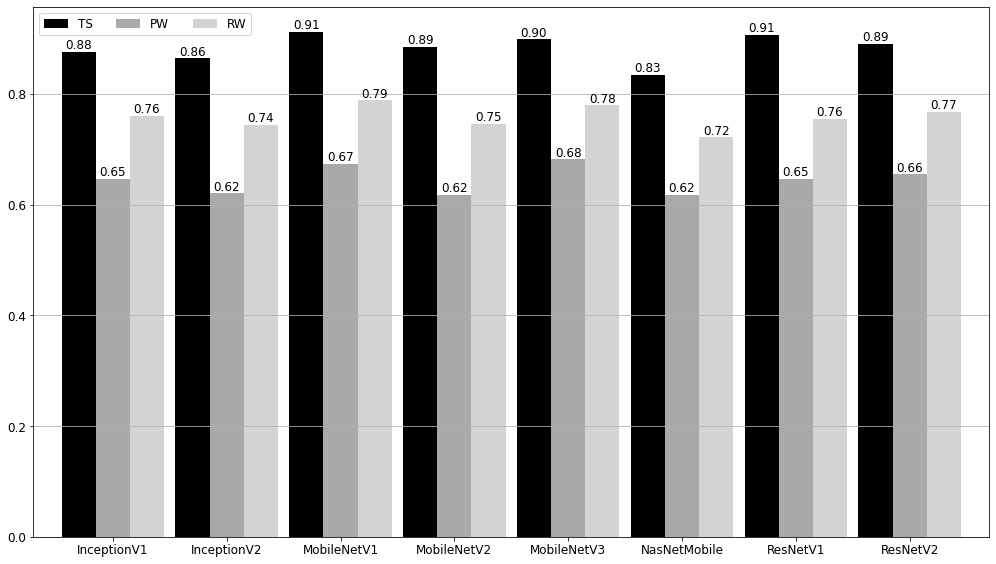

In [5]:
font = {'family' : 'normal',
        'size'   : 12}
pyplt.rc('font', **font)
pyplt.rcParams["figure.figsize"] = (14,8)

plt = plot_data.plot.bar(x='Model',y=DATASET_IDS,color=['black','darkgray','lightgray'],width=0.9)
plt.legend(loc='upper left',ncol=3)
#plt.set_ylim([0.3,1.0])
plt.set_xlabel('')
plt.grid(axis='y')
plt.set_xticklabels(MODELS, rotation=0, ha='center')

for container in plt.containers:
  plt.bar_label(container,fmt='%.2f')
plt.get_figure().tight_layout()
plt.get_figure().savefig('vision_model_results.pdf')